# time series projects

# importing modules

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# loading the dataset

In [40]:
# Assuming you have a CSV file named 'data.csv'
df = pd.read_csv('time_series_data/daily-minimum-temperatures-in-me.csv')
df.head(3)

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8


In [41]:
df = pd.read_csv('time_series_data/daily-minimum-temperatures-in-me.csv', parse_dates=['Date'], index_col='Date')
df.head(3)

,Daily minimum temperatures
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8


In [42]:
print(df.head())  # View the first few rows of the DataFrame



           Daily minimum temperatures
Date                                 
1981-01-01                       20.7
1981-01-02                       17.9
1981-01-03                       18.8
1981-01-04                       14.6
1981-01-05                       15.8


In [43]:
print(df.info())  # Summary of DataFrame including data types

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Daily minimum temperatures  3650 non-null   object
dtypes: object(1)
memory usage: 57.0+ KB
None


# handling missing values

In [44]:
df = df.dropna()  # Drop rows with missing values


# renaming colums

In [45]:
new_names_dict = {'Daily minimum temperatures': 'temp',}
df.rename(columns=new_names_dict, inplace=True)
df.head(2)

,temp
Date,
1981-01-01,20.7
1981-01-02,17.9


# string to float conversion 

In [46]:
import pandas as pd

# Custom function to clean up the string and convert to float
def clean_and_convert(value):
    cleaned_value = ''.join(char for char in str(value) if char.isdigit() or char == '.')
    try:
        return float(cleaned_value)
    except ValueError:
        return None  # or any other suitable value indicating failure

# Apply the custom function to the column
df['temp'] = df['temp'].apply(clean_and_convert)

# Display the DataFrame
print(df)


            temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
...          ...
1990-12-27  14.0
1990-12-28  13.6
1990-12-29  13.5
1990-12-30  15.7
1990-12-31  13.0

[3650 rows x 1 columns]


In [47]:
# Down-sample to monthly frequency
df_monthly = df.resample('M').mean()


In [48]:
# Compute rolling mean over a window of 30 days
rolling_mean = df['temp'].rolling(window=30).mean()


In [49]:
# Select data for a specific date range
df['1981-01-01':'1981-12-31']

,temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1981-12-27,15.5
1981-12-28,13.3
1981-12-29,15.6


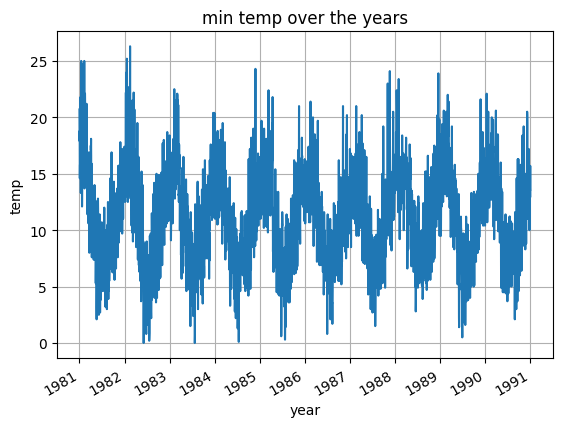

In [50]:
# plotting the data using matplotlib

import matplotlib.pyplot as plt

# Plot time series data
df['temp'].plot()
plt.xlabel('year')
plt.ylabel('temp')
plt.title('min temp over the years')
plt.grid(True)
plt.show()


In [51]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Reset the index
df.reset_index(drop=True, inplace=True)

# Assuming you have defined your SARIMAX model and fitted it
model = SARIMAX(df['temp'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_invertibility=False)
results = model.fit()

# Define the number of periods to forecast
n_periods = 5  # Change this to the number of periods you want to forecast

# Forecast
forecast = results.predict(start=len(df), end=len(df) + n_periods - 1)
print(forecast)


3650    13.243895
3651    13.576877
3652    13.602072
3653    13.600357
3654    13.519427
Name: predicted_mean, dtype: float64


# project 2 

# importing lib

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# creating time series data 

In [55]:
# Create a date range
date_range = pd.date_range(start='2022-01-01', end='2024-12-31', freq='D')

# Create a DataFrame with random data
data = {'Date': date_range,
        'Value': np.random.randn(len(date_range))}
df = pd.DataFrame(data)
df.tail(3)

,Date,Value
1093,2024-12-29,-0.090687
1094,2024-12-30,0.184932
1095,2024-12-31,-0.414031


# Setting Index to Datetime

In [56]:
# Convert 'Date' column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Value
Date,
2022-01-01,1.120821
2022-01-02,0.122413
2022-01-03,-0.144733
2022-01-04,-1.061040
2022-01-05,-0.104787


# Resampling Time Series Data

In [57]:
# Resample data to monthly frequency, taking the mean of each month
monthly_data = df.resample('M').mean()


# Plotting Time Series Data

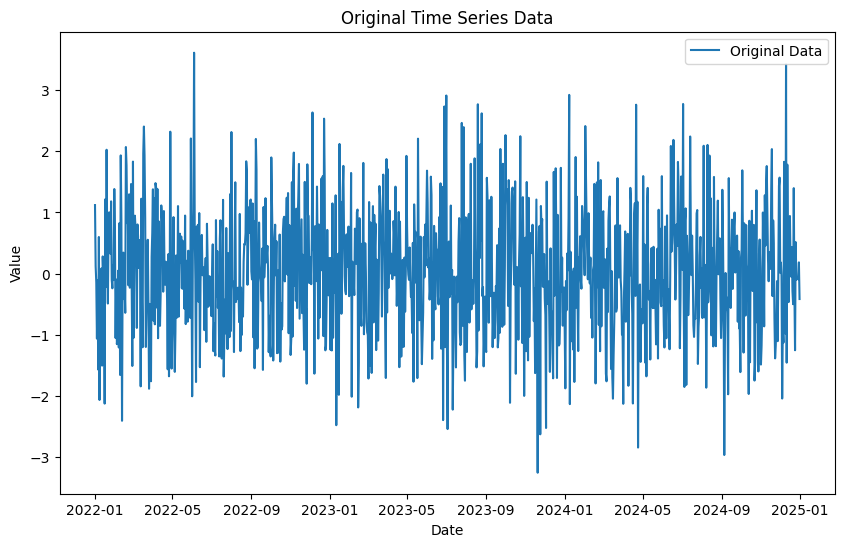

In [58]:
# Plot the original time series data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], label='Original Data')
plt.title('Original Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


# Rolling Statistics

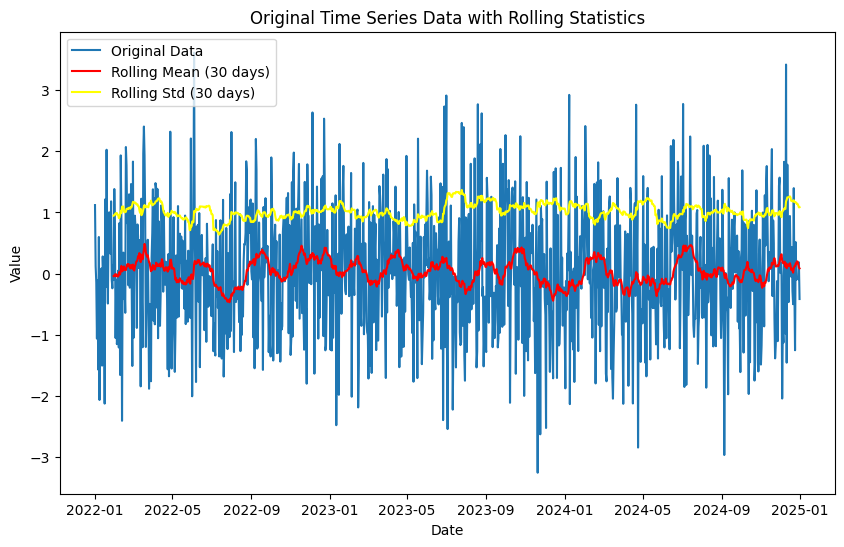

In [61]:
# Calculate rolling mean and standard deviation
rolling_mean = df['Value'].rolling(window=30).mean()  # 30-day rolling mean
rolling_std = df['Value'].rolling(window=30).std()    # 30-day rolling standard deviation

# Plot original data with rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], label='Original Data')
plt.plot(df.index, rolling_mean, label='Rolling Mean (30 days)',color="red")
plt.plot(df.index, rolling_std, label='Rolling Std (30 days)',color="yellow")
plt.title('Original Time Series Data with Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


# Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)

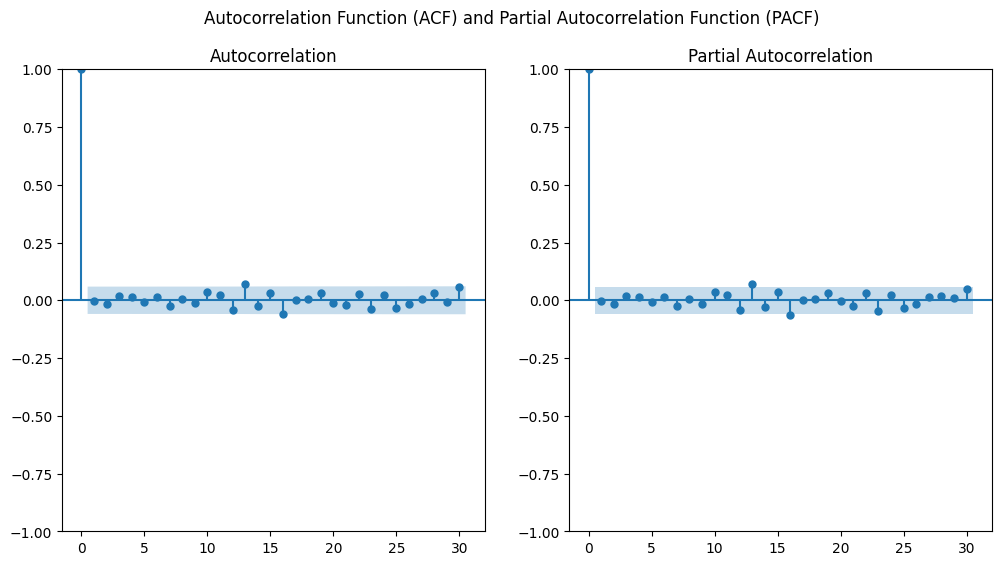

In [62]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(df['Value'], lags=30, ax=plt.subplot(1, 2, 1))
plot_pacf(df['Value'], lags=30, ax=plt.subplot(1, 2, 2))
plt.suptitle('Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)')
plt.show()


# project 3 

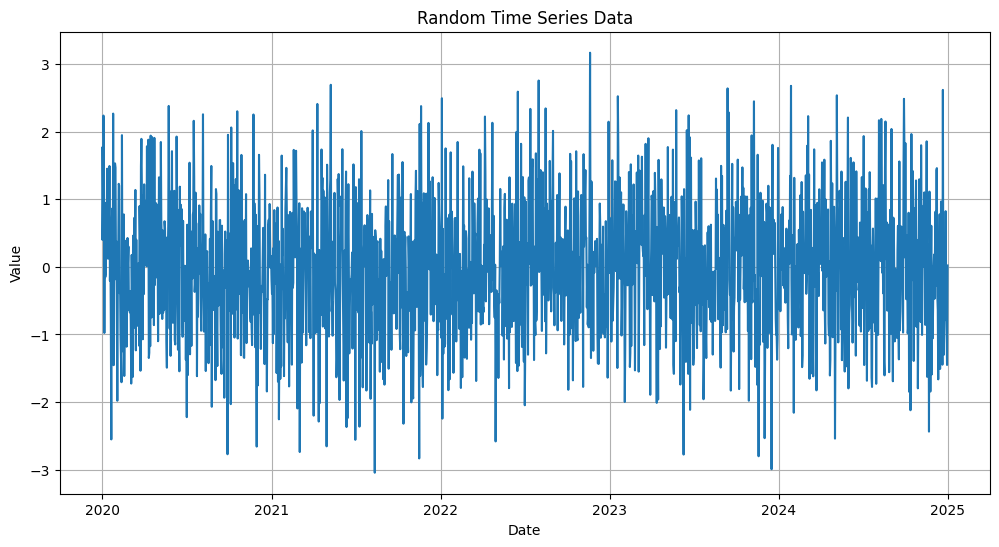

        Date     Value
0 2020-01-01  1.764052
1 2020-01-02  0.400157
2 2020-01-03  0.978738
3 2020-01-04  2.240893
4 2020-01-05  1.867558


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(0)

# Generate a random time series dataset
date_range = pd.date_range(start='2020-01-01', end='2024-12-31', freq='D')
data = np.random.randn(len(date_range))  # Generating random data
ts_df = pd.DataFrame({'Date': date_range, 'Value': data})

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(ts_df['Date'], ts_df['Value'])
plt.title('Random Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Display the first few rows of the DataFrame
print(ts_df.head())


# Now, let's perform basic time series analysis and predict future values using a simple model, such as autoregressive integrated moving average (ARIMA):

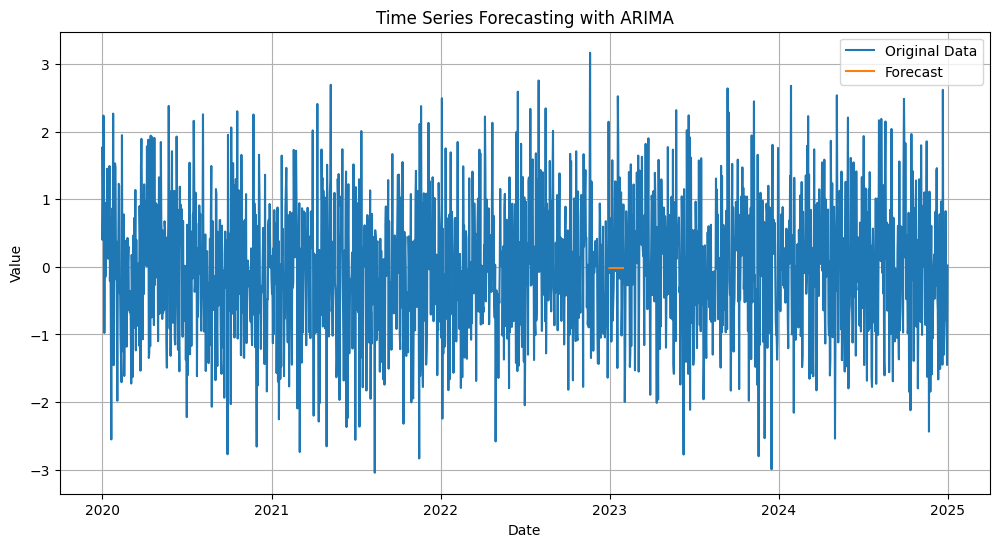

Forecasted Values:
1827   -0.017499
1828   -0.016461
1829   -0.016489
1830   -0.016488
1831   -0.016488
1832   -0.016488
1833   -0.016488
1834   -0.016488
1835   -0.016488
1836   -0.016488
1837   -0.016488
1838   -0.016488
1839   -0.016488
1840   -0.016488
1841   -0.016488
1842   -0.016488
1843   -0.016488
1844   -0.016488
1845   -0.016488
1846   -0.016488
1847   -0.016488
1848   -0.016488
1849   -0.016488
1850   -0.016488
1851   -0.016488
1852   -0.016488
1853   -0.016488
1854   -0.016488
1855   -0.016488
1856   -0.016488
Name: predicted_mean, dtype: float64


In [64]:
from statsmodels.tsa.arima.model import ARIMA

# Perform ARIMA modeling
model = ARIMA(ts_df['Value'], order=(1, 1, 1))  # Using ARIMA(1,1,1) as an example
fit_model = model.fit()

# Predict future values
future_steps = 30  # Predicting 30 future steps
future_forecast = fit_model.forecast(steps=future_steps)

# Plot the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(ts_df['Date'], ts_df['Value'], label='Original Data')
plt.plot(pd.date_range(start='2023-01-01', periods=future_steps, freq='D'), future_forecast, label='Forecast')
plt.title('Time Series Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Display the forecasted values
print("Forecasted Values:")
print(future_forecast)


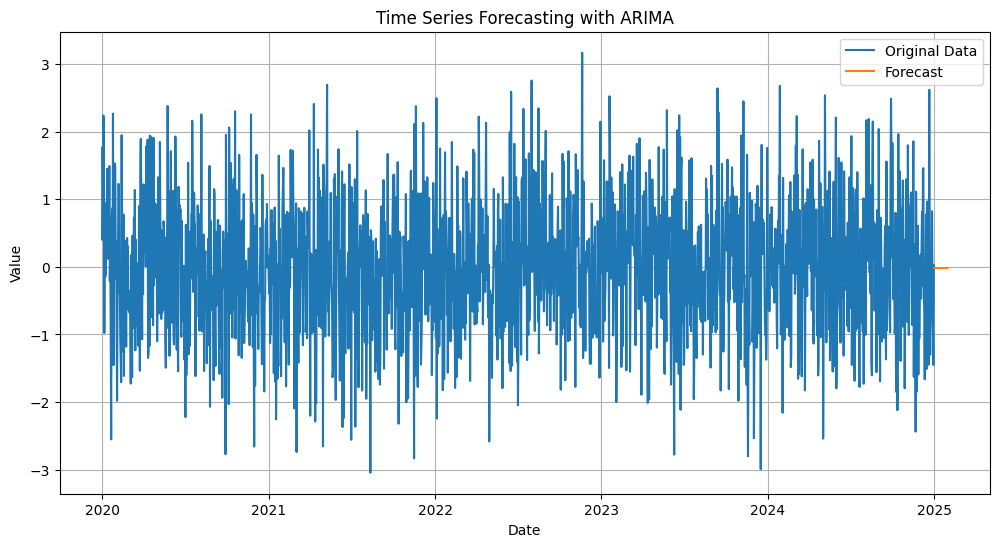

Forecasted Values:
2025-01-01   -0.017499
2025-01-02   -0.016461
2025-01-03   -0.016489
2025-01-04   -0.016488
2025-01-05   -0.016488
2025-01-06   -0.016488
2025-01-07   -0.016488
2025-01-08   -0.016488
2025-01-09   -0.016488
2025-01-10   -0.016488
2025-01-11   -0.016488
2025-01-12   -0.016488
2025-01-13   -0.016488
2025-01-14   -0.016488
2025-01-15   -0.016488
2025-01-16   -0.016488
2025-01-17   -0.016488
2025-01-18   -0.016488
2025-01-19   -0.016488
2025-01-20   -0.016488
2025-01-21   -0.016488
2025-01-22   -0.016488
2025-01-23   -0.016488
2025-01-24   -0.016488
2025-01-25   -0.016488
2025-01-26   -0.016488
2025-01-27   -0.016488
2025-01-28   -0.016488
2025-01-29   -0.016488
2025-01-30   -0.016488
Freq: D, Name: predicted_mean, dtype: float64


In [65]:
# Convert index to dates
future_dates = pd.date_range(start=ts_df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=future_steps, freq='D')
future_forecast.index = future_dates

# Plot the original data and the forecasted values with dates
plt.figure(figsize=(12, 6))
plt.plot(ts_df['Date'], ts_df['Value'], label='Original Data')
plt.plot(future_forecast.index, future_forecast, label='Forecast')
plt.title('Time Series Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Display the forecasted values with dates
print("Forecasted Values:")
print(future_forecast)
